This is a simple example of CIFAR-10 dataset.
CIFAR-10 is a object dataset consisting of 10 objects namely Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. To know more about the dataset, check out the link here: https://www.cs.toronto.edu/~kriz/cifar.html

I start with importing the libraries which will be used.

In [41]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten, BatchNormalization
from keras.layers import Dense, Dropout

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import keras

Loading the data:
As mentioned [here](https://www.cs.toronto.edu/~kriz/cifar.html) the images are in the form of numpy arrays stored in a pickle file. We read the numpy image arrays and corresponding image labels.

In [42]:
def load_cifar10_data(batch_number):
    with open('../input/data_batch_'+ str(batch_number), 'rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data']
    labels = batch['labels']
    return features, labels

There are 5 batches of labeled data that can be used for training and validation and 1 batch that can be used for testing.
Each batch contains 10000 random images and their corresponding labels. I load the data using the function load_cifar_data.

In [43]:
batch_1, labels_1 = load_cifar10_data(1)
batch_2, labels_2 = load_cifar10_data(2)
batch_3, labels_3 = load_cifar10_data(3)
batch_4, labels_4 = load_cifar10_data(4)
batch_5, labels_5 = load_cifar10_data(5)

I just append numpy arrays of first two batch just to get the idea of how the images look like.
The images need to be reshaped from 1-Dimentional numpy array to 3-Dimentional numpy array as mentioned [here](https://www.cs.toronto.edu/~kriz/cifar.html).
The images are 3-Dimentional (32x32x3) as the first and the second dimention mention the length and width of the image. THe third dimention indicates r,g,b components i.e the image is a coloured image.

In [44]:
all_images = np.append(batch_1, batch_2, axis=0)
all_images = all_images.reshape((len(all_images), 3, 32, 32)).transpose(0,2,3,1)
all_labels = np.append(labels_1, labels_2, axis=0)

The dataset contains the labels in the form of digits from 0 to 9.
I convert the numeric labels to words using the dictionary.
Secondly, I plot the image just to inspect them visually.

In [45]:
dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:'Cat', 4:'Deer', 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'Truck'}
def plot_image(number):
    fig = plt.figure(figsize = (15,8))
    plt.imshow(all_images[number])
    plt.title(dict[all_labels[number]])

Plotting a few images.

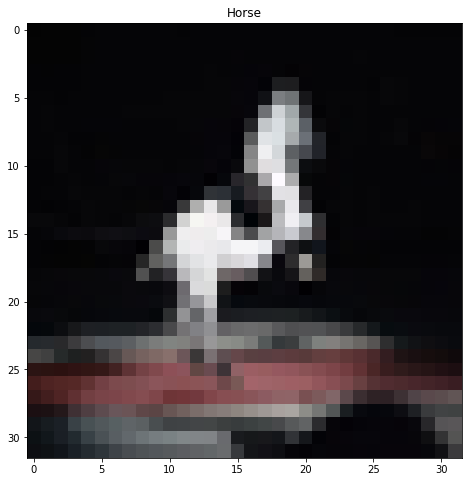

In [46]:
plot_image(321)

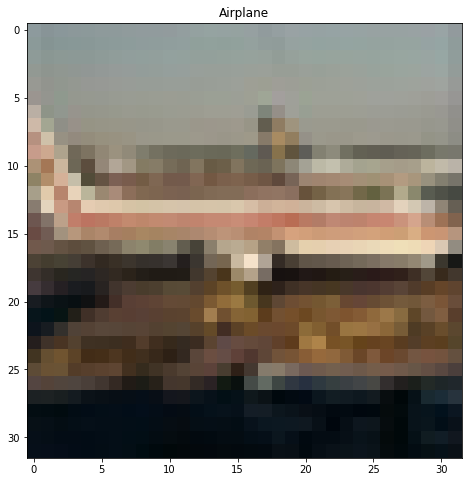

In [47]:
plot_image(2490)

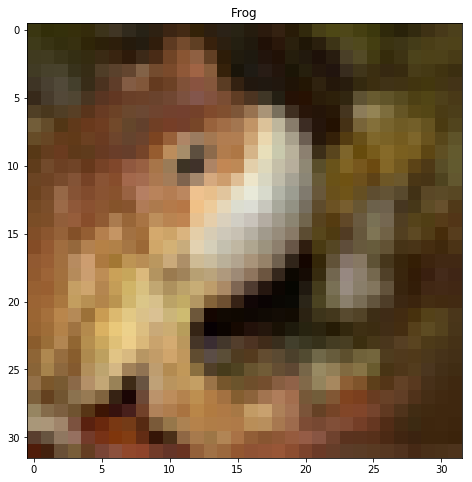

In [48]:
plot_image(4201)

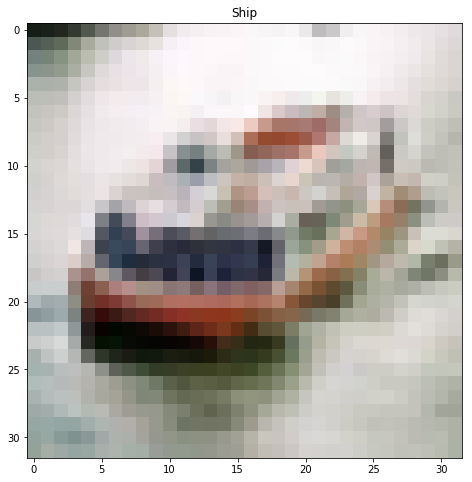

In [49]:
plot_image(3430)

For purpose of simplicity, I load different 1-D numpy arrays into one single batch of 40000 images.
The first 8000 arrays or images from each batch are appended to a single batch of X_train

In [50]:
X_train = np.append(batch_1[0:8000], batch_2[0:8000], axis=0)
X_train = np.append(X_train, batch_3[0:8000], axis=0)
X_train = np.append(X_train, batch_4[0:8000], axis=0)
X_train = np.append(X_train, batch_5[0:8000], axis=0)

Similarly the training labels are appended to a single batch of Y_train containing 40000 labels of the corresponding training images.

In [51]:
Y_train = np.append(labels_1[0:8000], labels_2[0:8000], axis=0)
Y_train = np.append(Y_train, labels_3[0:8000], axis=0)
Y_train = np.append(Y_train, labels_4[0:8000], axis=0)
Y_train = np.append(Y_train, labels_5[0:8000], axis=0)

The images between 8000 and 9000 are loaded to dataset which will be used for validation.
X_validation contains 1000 images.

In [52]:
X_validation = np.append(batch_1[8001:9000], batch_2[8001:9000], axis=0)
X_validation = np.append(X_validation, batch_3[8001:9000], axis=0)
X_validation = np.append(X_validation, batch_4[8001:9000], axis=0)
X_validation = np.append(X_validation, batch_5[8001:9000], axis=0)

The labels between 8000 and 9000 are loaded to dataset which will be used for validation.
Y_validation contains 1000 labels of the corresponding X_validation images.

In [53]:
Y_validation = np.append(labels_1[8001:9000], labels_2[8001:9000], axis=0)
Y_validation = np.append(Y_validation, labels_3[8001:9000], axis=0)
Y_validation = np.append(Y_validation, labels_4[8001:9000], axis=0)
Y_validation = np.append(Y_validation, labels_5[8001:9000], axis=0)

The images between 9000 and 10000 are loaded to dataset which will be used for testing after the model has been trained.
X_test contains 1000 images.

In [54]:
X_test = np.append(batch_1[9001:10000], batch_2[9001:10000], axis=0)
X_test = np.append(X_test, batch_3[9001:10000], axis=0)
X_test = np.append(X_test, batch_4[9001:10000], axis=0)
X_test = np.append(X_test, batch_5[9001:10000], axis=0)

The labels between 9000 and 10000 are loaded to dataset which will be used for testing after the model has been trained.
Y_test contains 1000 labels of the corresponding X_test images.

In [55]:
Y_test = np.append(labels_1[9001:10000], labels_2[9001:10000], axis=0)
Y_test = np.append(Y_test, labels_3[9001:10000], axis=0)
Y_test = np.append(Y_test, labels_4[9001:10000], axis=0)
Y_test = np.append(Y_test, labels_5[9001:10000], axis=0)

In [56]:
print("Length of X_train:", len(X_train), "Length of Y_train:", len(Y_train))
print("Length of X_validation:",len(X_validation), "Length of Y_validation:", len(Y_validation))
print("Length of X_test:",len(X_test), "Length of Y_test:", len(Y_test))

Length of X_train: 40000 Length of Y_train: 40000
Length of X_validation: 4995 Length of Y_validation: 4995
Length of X_test: 4995 Length of Y_test: 4995


We give the labels to the neural network in one-hot-encoded format.
Keras has the np_utils.to_categorical to help us do it.
To elaborate on one-hot encoding:
* Label 5 is given as [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0 ] where the 5th digit is 1 and rest all are 0's.
* Label 8 is given as [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 0 ] where the 8th digit is 1 and rest all are 0's.

In [57]:
Y_train_one_hot = np_utils.to_categorical(Y_train, 10)
Y_validation_one_hot = np_utils.to_categorical(Y_validation, 10)
Y_test_one_hot = np_utils.to_categorical(Y_test, 10)

This is where we convert the 1-D numpy arrays into 4-D numpy arrays.
The conversion is done on all the training, validation and test sets.

In [58]:
X_train = X_train.reshape((len(X_train), 3, 32, 32)).transpose(0,2,3,1)
X_validation = X_validation.reshape((len(X_validation), 3, 32, 32)).transpose(0,2,3,1)
X_test = X_test.reshape((len(X_test), 3, 32, 32)).transpose(0,2,3,1)

Initially I used just 1 convolution layer.
Upon increasing the convolution layers, the performance of the model increased.
I increase the number of feature images from 32 in first convolution layer increasing with the multiple of 2 to 128 in the fourth layer.
The ImageDataGenerator scales down the color value by 255. The horizontal flip and vertical flip helps in flipping the training images so that model gets trained better for all possible images.
Finally I add 2 hidden layers.
I use the default 'adam optimizer'.
Categorical crossentropy is used for categorical output as is the case with this dataset.

In [59]:
classifier = Sequential()

# Convolution layer 1
classifier.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same', bias=True))

# Pooling layer 1
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

# Convolution and pooling layer 2
classifier.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', bias=True))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.3))

# Classifier and pooling layer 3.
classifier.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', bias=True))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.3))

# Classifier and pooling layer 4.
classifier.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same', bias=True))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.3))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(BatchNormalization())
classifier.add(Dense(output_dim = 128, activation='relu'))
classifier.add(Dense(output_dim = 10, activation='softmax'))

classifier.summary()

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_datagen.flow(X_train, Y_train_one_hot, batch_size=32)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_set = validation_datagen.flow(X_validation, Y_validation_one_hot, batch_size=32)


classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit_generator(train_set,
                    steps_per_epoch=40000,epochs=10,
                    validation_data=(validation_set), validation_steps=4995, shuffle=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same", use_bias=True)`
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", use_bias=True)`
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", use_bias=True)`
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same", use_bias=True)`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: Us

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          36928     
__________

I test the accuraccy of test dataset. It is scaled down to values between 0 to 1 as in the case of training and validation dataset.

In [60]:
X_test = (X_test)*1./255 
scores = classifier.evaluate(X_test, Y_test_one_hot, batch_size=32)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

4995/4995 [==============================] - 1s 124us/step

Test result: 81.902 loss: 0.537


Testing the model with the test images in the test set that is X_test.

In [61]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
def show_test(number):
    fig = plt.figure(figsize = (15,8))
    test_image = np.expand_dims(X_test[number], axis=0)
    test_result = classifier.predict_classes(test_image)
    plt.imshow(X_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {}, Actual: {}".format(labels[dict_key], labels[Y_test[number]]))

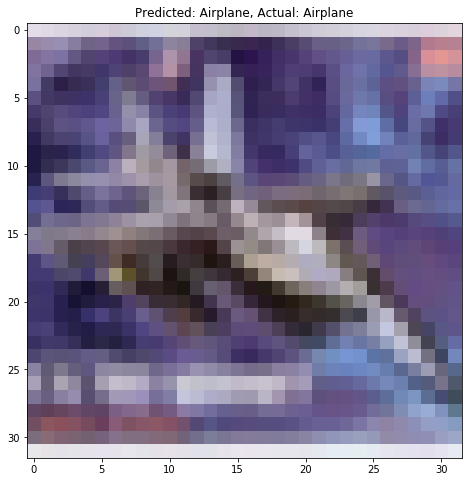

In [62]:
show_test(123)

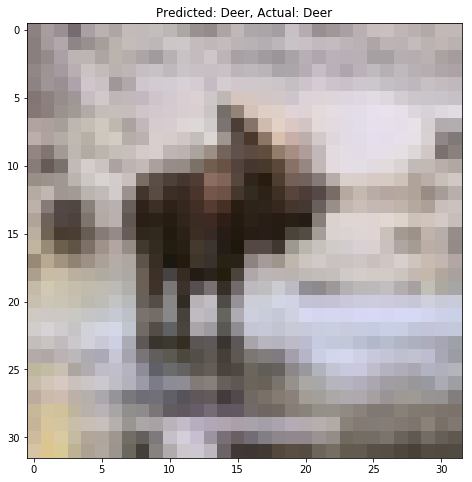

In [63]:
show_test(9)

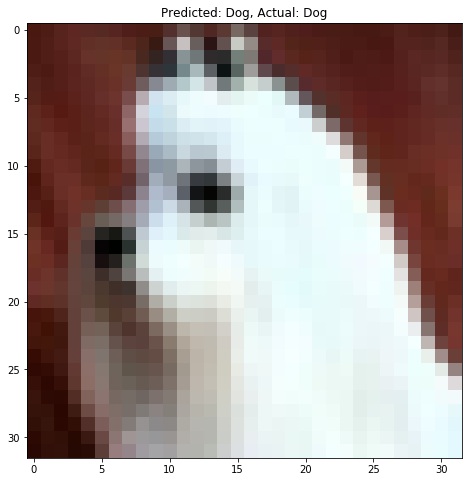

In [64]:
show_test(490)

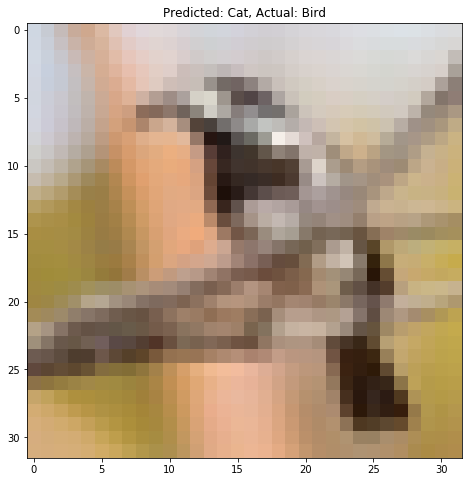

In [85]:
show_test(558)